# House Price Prediction

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('House Dataset.xlsx')

In [3]:
df.shape #cecking for the size of the dataset

(414, 9)

In [4]:
df.isna().sum() #checking for missing values

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
df.duplicated().sum() #checking for duplicated values

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


##### There are no missing data or duplicating data. There are no irregularities too except that the Transaction date is not in a datetime format but that will not be faced as I don't need the column. After observing the columns, it occurs that to get the total price, the price per unit area has to be multiplied by the House size. 

In [8]:
df['Price']=df['House size (sqft)'] * df['House price of unit area']

In [9]:
def plot_scatter(x_var,xlabel):
    """
    This funtion plots the relationship between a variable and the price of the house.
    x_var: series object
    The variable plotted against price
    
    x_label: string
    Label of the x axis
    
    return
    -------
    A scatter plot showing the relationship between two variables.
    """
    plt.scatter(x=x_var,y=df['Price'])
    plt.xlabel(xlabel)
    plt.ylabel("House Price")
    plt.title("Relationship between "+ '"'+ xlabel + '"'+ " and Price of the House")
    sns.regplot(x=x_var,y=df['Price'],ci=None)
    plt.plot()

There seem to be no relationship between transaction date and the price of the house. 

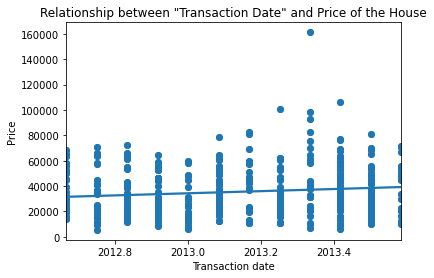

In [10]:
plot_scatter(df['Transaction date'],'Transaction Date')

There seem to be a negative correlation between the distance from the nearest metro station and price. Increased house price has lesser distance to the metro station. This is only logical

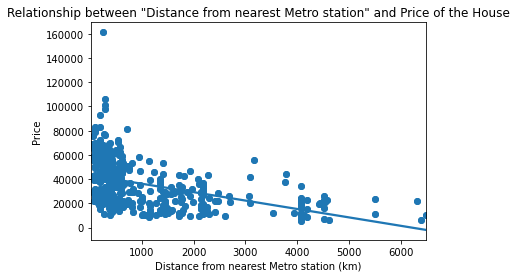

In [11]:
plot_scatter(df['Distance from nearest Metro station (km)'],'Distance from nearest Metro station')


There seem to be a slight positive correlation between number of convenience store and price as there seem to be more points and taller points as the number of convenience stores increases. 

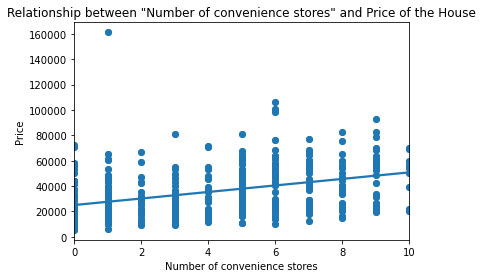

In [12]:
plot_scatter(df['Number of convenience stores'],'Number of convenience stores')

There is a positive correlation between number of bedrooms and price of the house. Theere seem to be an increase in the number of points with increase in number of bedrooms. 

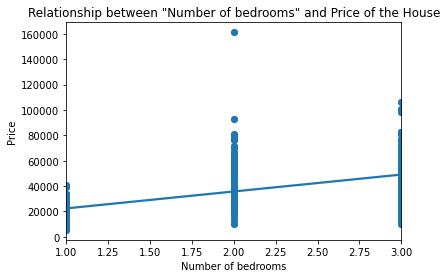

In [13]:
plot_scatter(df['Number of bedrooms'],'Number of bedrooms')

There seem to be a negative correlation as the age of house increases, the price decreases. This is expected because new house tend to cost more. 

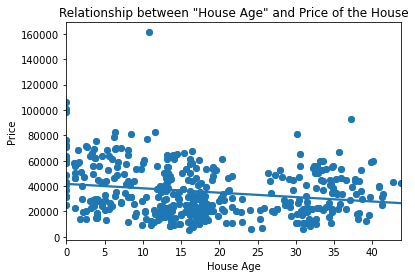

In [14]:
plot_scatter(df['House Age'],'House Age')

The longitude and latitude shows a positive correlation with increase in price. 

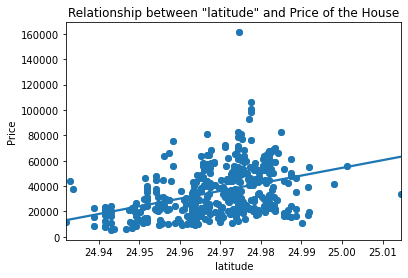

In [15]:
plot_scatter(df['latitude'],'latitude')

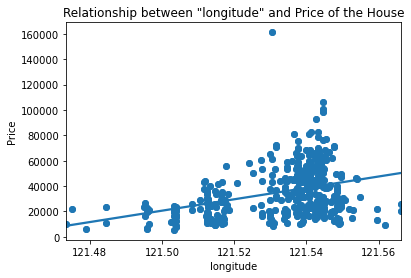

In [16]:
plot_scatter(df['longitude'],'longitude')

Finally, The house price also shows a positive coreerlation with the house size. This is logical as bigger houses generally cost higher. 

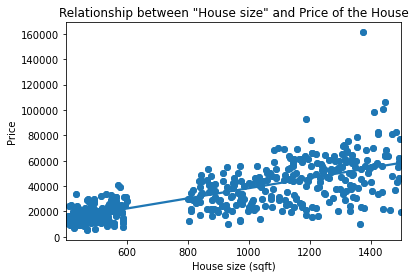

In [17]:
plot_scatter(df['House size (sqft)'],'House size')

Ofcourse, The House price of unit area is highly correlated with the price of the house

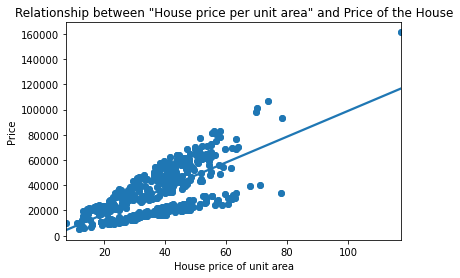

In [18]:
plot_scatter(df['House price of unit area'],'House price per unit area')

In [19]:
df.corr(method='pearson') #observing the correlation between the variables. 

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529,0.119059
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567,-0.198741
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613,-0.441094
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005,0.381169
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307,0.378440
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287,0.346538
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265,0.548679
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489,0.702782
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000,0.698585
Price,0.119059,-0.198741,-0.441094,0.381169,0.378440,0.346538,0.548679,0.702782,0.698585,1.000000


In [20]:
df=df.drop(['Transaction date'], axis=1) #since I won't be needing the column

There seem to be traces of multicollinearity between some of the independent variables such as longitude and latitude, House size, House price of unit area and Number of bedrooms. This poses as a problem because we might not be able too see the individual effect of each variable since increase in one leads to increase in another.

In [21]:
""" Calculating Variable Inflation Feature to expose multicollinearity. VIF between 1-5 is safe but anything higher is taken
as threat"""
X=df.drop(['Price'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
pd.options.display.float_format = '{:.2f}'.format  
print(vif_data)

                                    feature        VIF
0                                 House Age       3.90
1  Distance from nearest Metro station (km)       3.77
2              Number of convenience stores       5.17
3                                  latitude 6324254.90
4                                 longitude 6317541.04
5                        Number of bedrooms      16.07
6                         House size (sqft)      19.04
7                  House price of unit area      20.53


The suspected variables are indeed correlated. Latitude, longitude, Number of bedrooms, House price of unit area and House size have high VIF each. This will result to dropping one of each groups including the Transaction date (which isn't useful for my prediction). Since that will lead to decrease in feature which may be or may not be adding information to the model, I'll create another dataframe without those columns and keep the old one. 

In [22]:
#dropping one of each of the correlated colummns and House price of unit area since I don't need it anymore
df_new=df.drop(['latitude','Number of bedrooms','House price of unit area'],axis=1)

In [23]:
df_new

,House Age,Distance from nearest Metro station (km),Number of convenience stores,longitude,House size (sqft),Price
0,32.00,84.88,10,121.54,575,21792.50
1,19.50,306.59,9,121.54,1240,52328.00
2,13.30,561.98,5,121.54,1060,50138.00
3,13.30,561.98,5,121.54,875,47950.00
4,5.00,390.57,5,121.54,491,21162.10
...,...,...,...,...,...,...
409,13.70,4082.01,0,121.50,803,12366.20
410,5.60,90.46,9,121.54,1278,63900.00
411,18.80,390.97,7,121.54,503,20421.80
412,8.10,104.81,5,121.54,597,31342.50


In [24]:
#creating my X_correlated and y_correlated variables with DataFrame that has all correlated columns
X_correlated=df.drop(['Price'],axis=1)
y_correlated=df['Price']

In [25]:
#creating X and y varaibles with DataFrame that has selected columns 
X=df_new.drop(['Price'],axis=1)
y=df_new['Price']

In [26]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split( X_correlated, y_correlated, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [28]:
#scaling the X variables since they are all on different scales
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
X_trainc_scaled = sc.fit_transform(X_trainc)
X_testc_scaled = sc.fit_transform(X_testc)

In [29]:
def regression_model(model,correlated=True):
    """
    
    This function calculates a cross-validation of the model specified
    
    model: A regression model
    
    correlated: boolean
    
    if True:
    The variables used are from the dataframe in which VIF has been taken into consideration to curb multicollinearity
    if False:
    The variables used are from the normal dataframe
    
    returns:
    --------
    A list
    The list consist of RMSE value of training set, RMSE value of test set and The R2 score of the model.
    
    """
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    if correlated:
        regression = model.fit(X_trainc_scaled,y_trainc)
        score_train = -1 * cross_val_score(regression, X_trainc_scaled, y_trainc, cv=cv, scoring='neg_root_mean_squared_error').mean()
        score_test = mean_squared_error(y_testc, regression.predict(X_testc_scaled), squared=False)
        r2score = r2_score(y_testc, regression.predict(X_testc_scaled))
        return [score_train,score_test,r2score]
    else:
        regression = model.fit(X_train_scaled, y_train)
        score_train = -1 * cross_val_score(regression, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
        score_test = mean_squared_error(y_test, regression.predict(X_test_scaled), squared=False)
        r2score = r2_score(y_test, regression.predict(X_test_scaled))
        return [score_train,score_test,r2score]

In [30]:
# Models with DataFrame that are correlated
LR = regression_model(LinearRegression())
LCV = regression_model(LassoCV())
RCV = regression_model(RidgeCV())
RF = regression_model(RandomForestRegressor())

# Models with DataFrame with reduced multicollinearity 
LR_ = regression_model(LinearRegression(),correlated=False)
LCV_ = regression_model(LassoCV(),correlated=False)
RCV_= regression_model(RidgeCV(),correlated=False)
RF_ = regression_model(RandomForestRegressor(),correlated=False)

Before evaluation, another method that can help with multicollinearity will be Principal component analysis and Partial least squares. So I'll be exploring these options and then evaluate with the metrics of the models above

In [31]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_trainc_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7
0,0.05,0.09,0.94,-0.07,0.04,0.31,0.05,0.04
1,0.51,-0.05,-0.04,0.29,-0.14,0.01,0.02,0.80
2,-0.41,0.04,0.19,0.15,-0.77,-0.41,-0.02,0.09
3,-0.40,0.01,0.14,0.63,0.55,-0.32,0.02,0.14
4,-0.45,0.04,-0.03,-0.65,0.22,-0.09,0.03,0.56


In [32]:
pca.explained_variance_ratio_

array([0.40842028, 0.21973793, 0.13311552, 0.07759474, 0.0698711 ,
       0.04441368, 0.02987084, 0.0169759 ])

In [33]:
#observing columns with the most variance according to PCA
model = PCA(n_components=5)
X_pc = model.fit_transform(X_trainc)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_trainc.columns[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_ = pd.DataFrame(dic.items())
df_

,0,1
0,PC0,Distance from nearest Metro station (km)
1,PC1,House size (sqft)
2,PC2,House Age
3,PC3,House price of unit area
4,PC4,Number of convenience stores


The dataframe above shows that 'Distance from the nearest Metro station (km)' has the most variance according to PCA follow by 'House size' and so on. 

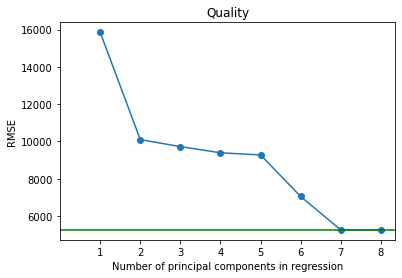

In [34]:
#Visualizing the Principal components to pick the most suitable number of component
cv = KFold(n_splits=10, shuffle=True, random_state=42)
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_trainc, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=LR[0], color='g', linestyle='-')

It shows, having 7 features is similar to having 8 as the RMSE remains constant for the model. Now I will perform PCA for the exact number of component. 

In [35]:
best_pc_num = 7

# Train model with first 7 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_trainc)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_trainc, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_trainc)

# Get first 7 principal components of test set
X_test_pc = pca.transform(X_testc_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_testc, preds, squared=False)
pcr_r2score = r2_score(y_testc, lin_reg_pc.predict(X_test_pc))

Text(0.5, 1.0, 'hp')

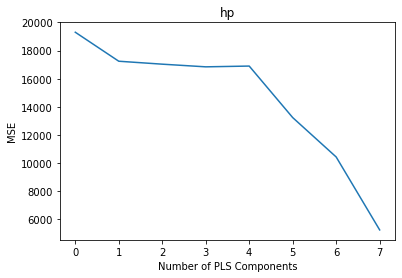

In [36]:
#Partial least squares
rmse_list=[]
for i in range(1, X_trainc_scaled.shape[1]+1):
    pls = PLSRegression(n_components=i)
    rmse_score = -1 * cross_val_score(pls, 
                                      X_trainc_scaled[:,:i],
                                      y_trainc, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

#plot test MSE vs. number of components
plt.plot(rmse_list)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

The above shows that the RMSE kept decreasing with an increase in the components. Using all 7 components wouldn't be such a bad idea afterall and judging by this, there is possibility that more features can improve the model but I'll save the conclusion till the evaluation stage. 

In [37]:
#USing all 7 components for PLS method
PLS=regression_model(PLSRegression(n_components=7))

Now with all models done, I will create a dataframe with every of the results. 

In [38]:
final_df = pd.DataFrame()

final_df["Models"] = ['Linear Regression(correlated)','Linear Regression (VIF)','Lasso Regression (correlated)',
                      'Lasso Regression (VIF)','Ridge Regression (correlated)', 'Ridge Regression (VIF)',
                      'Random Forest Regression (VIF)', 'Random Forest Regression (correlated)','Principal Component Regression(7 components)','Partial Least Squares']
final_df["RMSE(Train Set)"] = [LR[0],LR_[0],LCV[0],LCV_[0],RCV[0],
                               RCV_[0],RF_[0],RF[0],pcr_score_train,PLS[0]]
final_df["RMSE(Test Set)"] = [LR[1],LR_[1],LCV[1],LCV_[1],RCV[1],
                               RCV_[1],RF_[1],RF[1],pcr_score_test,PLS[1]]
final_df["R2 Score"] = [LR[2],LR_[2],LCV[2],LCV_[2],RCV[2],
                               RCV_[2],RF_[2],RF[2],pcr_r2score,PLS[2]]

In [39]:
final_df

,Models,RMSE(Train Set),RMSE(Test Set),R2 Score
0,Linear Regression(correlated),5250.20,4989.36,0.93
1,Linear Regression (VIF),10536.08,8295.84,0.81
2,Lasso Regression (correlated),5150.57,4898.22,0.93
3,Lasso Regression (VIF),10503.77,8256.99,0.81
4,Ridge Regression (correlated),5265.52,4986.31,0.93
5,Ridge Regression (VIF),10529.79,8291.07,0.81
6,Random Forest Regression (VIF),9568.53,7987.91,0.83
7,Random Forest Regression (correlated),3657.82,3234.30,0.97
8,Principal Component Regression(7 components),5251.83,5016.48,0.93
9,Partial Least Squares,5249.29,4990.62,0.93


## In Conclusion
The model with correlated features gave the best result possibly because even though it is correlated, every of the features are useful and adds more information during the prediction of House prices. Removing variables that has high VIF seems to make the model behave poorly. I'm guessing even though they are correlated they have noise which adds important information to the model. Finally, Using PCA did seem to give an average result. It's not as good as using all the features (remember PCA decorrelates too) but it did way better than VIF. PLS did a little better than PCA and proved a better approach than PCA. In conclusion, the best model is the Random Forest Regression model with all features included. It has the highest R2 score and the lowest RMSE which is an impressive score. 

Even though linear regression was selected because of it's simplicity, it assumes a linear relationship among the variables which can be a con, hence Random Forest Regressor was adopted. The Random Forest tend to overfit but with the above result, there isn't any trace of overfitting. The PCA and PLS algorithms are used to take advantage of the multicollinearity. The VIF was used to remove collinearity totally. Ridge and Lasso Regression were used for regularization advantages in case of overfitting. According to this analysis and evaluation, I will recommend Random Forest Regressor because it could easily learn the complex and linear relationshipss between the variable and it gave the best result. 